# Machine Learning Essentials

In this Python notebook, we will cover the following topics:
- Predictive vs. descriptive modeling
- Supervised vs. unsupervised learning
- The concepts of features and labels
- Data splitting: train/test and cross-validation
- Introduction to scikit-learn pipelines

# Predictive vs. descriptive modeling

## 1. Descriptive Models

- Objective: understand and summarize patterns present in the data.
- Do not attempt to predict the future.
- Classic examples:
    - Clustering (K-means, DBSCAN)
    - PCA (dimensionality reduction)
    - Correlation analysis
    - Association rules

## 2. Predictive Models

- Objective: predict future or unknown values.
- Use explanatory variables to estimate a target variable.
- Classic examples:
    - Linear Regression
    - Random Forest
    - Neural Networks
    - SVM

## 3. Comparison Table

| Feature            | Descriptive                     | Predictive                       |
|--------------------|---------------------------------|----------------------------------|
| Objective           | Understand patterns             | Predict values                   |
| Has target variable? | ❌ No                          | ✅ Yes                            |
| Examples            | PCA, Clustering                | Regression, Classification       |
| Typical output      | Groups, components             | Probabilities, values            |
| Used for            | Exploration                     | Decision making                  |


## 4. Examples

### Kmeans

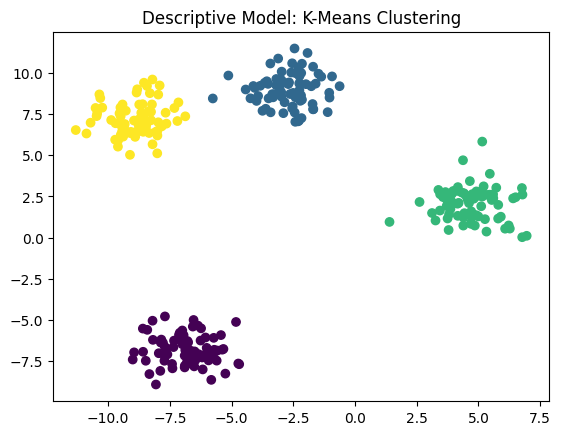

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans_model = KMeans(n_clusters=4)
cluster_labels = kmeans_model.fit_predict(data)

plt.scatter(data[:, 0], data[:, 1], c=cluster_labels)
plt.title("Descriptive Model: K-Means Clustering")
plt.show()


### Linear Regression

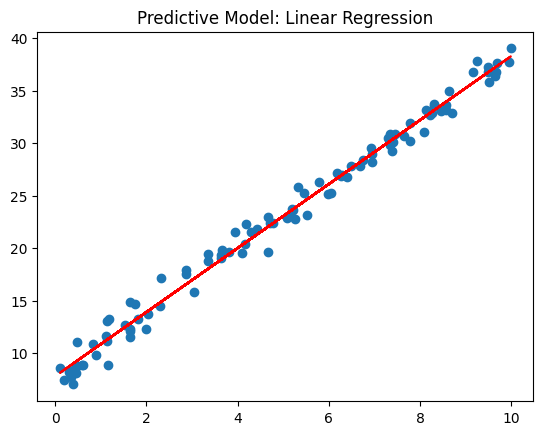

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + 8 + np.random.randn(100)

# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)
predictions = linear_model.predict(X)

# Plot data and regression line
plt.scatter(X, y)
plt.plot(X, predictions, color='red')
plt.title("Predictive Model: Linear Regression")
plt.show()


# Supervised vs Unsupervised

## 1. Supervised Learning
- There is a known target variable.
- The model learns a mapping:
    - X → y
- Objective: predict labels or values.
- Examples:
    - Linear / Logistic Regression
    - Random Forest
    - SVM
    - Neural Networks

## 2. Unsupervised Learning
- There is no target variable.
- The goal is to discover structure in the data.
- The model learns:
    - X → patterns / groups
- Examples:
    - K-means
    - PCA
    - DBSCAN
    - Association rules

## 3. Comparison Table

| Feature               | Supervised                       | Unsupervised                       |
|-----------------------|---------------------------------|-----------------------------------|
| Target variable       | ✅ Yes                            | ❌ No                             |
| Objective             | Predict values/labels             | Find patterns/structures          |
| Labeled data          | Required                          | Not required                      |
| Examples              | Regression, Classification        | Clustering, PCA                   |
| Typical output        | Prediction                        | Groups, components                |
| Typical use           | Decision making                   | Exploration and dimensionality reduction |

## 4. Examples

In [9]:
from sklearn.datasets import load_iris
#https://www.vertica.com/python/old/documentation_last/datasets/load_iris/index.php
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
#flowers with same features maybe are of same type
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

# Predict
preds = model.predict(X_test)
#0, 1, 2 → setosa, versicolor, virginica
print("how pred: ",preds)
print()
print("Accuracy:", accuracy_score(y_test, preds))



how pred:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]

Accuracy: 1.0


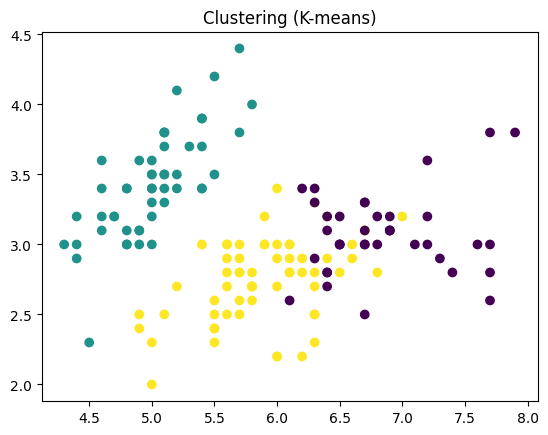

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Clustering (K-means)")
plt.show()


# Features and Labels

## 1. Features
- These are the input variables of the model.
- They represent observable properties of the data.
- They usually form a matrix X with dimensions:

`n_samples × n_features`

- Examples:
    - House size
    - Customer age
    - Colors in an image (pixels)
    - Time spent on a website

## 2. Labels (target)
- These are what we want to predict.
- Also called target, y, or dependent variable.
- They can be:
    - Numeric → regression
    - Categorical → classification
- Examples:
    - House price (regression)
    - Whether a customer will churn (classification)
    - Which object appears in an image (classification)

The *features* form the input matrix:

X = [ x11   x12   ...   x1p  <br>
      x21   x22   ...   x2p  <br>
      ...   ...   ...   ...  <br>
      xn1   xn2   ...   xnp ]

The *labels* are represented as:

y = [ y1 , y2 , ..., yn ]

In [5]:
import pandas as pd

data = pd.DataFrame({
    "size": [50, 80, 120, 60],
    "age": [10, 20, 5, 30],
    "price": [100000, 150000, 200000, 120000]
})

data


,size,age,price
0,50,10,100000
1,80,20,150000
2,120,5,200000
3,60,30,120000


In [6]:
X = data[["size", "age"]]   # features
y = data["price"]           # label

print("Features (X):\n", X)
print("\nLabels (y):\n", y)


Features (X):
    size  age
0    50   10
1    80   20
2   120    5
3    60   30

Labels (y):
 0    100000
1    150000
2    200000
3    120000
Name: price, dtype: int64


# Data Splitting: Train/Test and Cross-Validation

Before training a Machine Learning model, we need to ensure it generalizes well to unseen data.
To do this, we split the data into training and test sets, and sometimes use cross-validation to better evaluate performance.

## 1. Train/Test Split
- We split the data into a training set and a test set.
- Training: used to learn the model parameters.
- Test: used to evaluate how the model generalizes to new data.
- Typical proportion: 70/30, 80/20, or 75/25.

## 2. Cross-Validation (CV)
- Technique to evaluate the model more robustly.
- Splits the data into k folds:
    - Train on k-1 folds
    - Test on the remaining fold
    - Repeat k times
- Advantage: reduces evaluation variance and makes better use of the data.
- Common choices: k = 5 or k = 10.

## 3 . Code Examples

In [7]:
# Train/Test Split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Example dataset
data = pd.DataFrame({
    "size": [50, 80, 120, 60, 90, 70],
    "age": [10, 20, 5, 30, 15, 8],
    "price": [100000, 150000, 200000, 120000, 170000, 130000]
})

X = data[["size", "age"]]
y = data["price"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# 33% of the data for testing
# 67% of the data for training
# random_state for reproducibility

print("X_train:\n", X_train)
print("\nX_test:\n", X_test)


X_train:
    size  age
5    70    8
2   120    5
4    90   15
3    60   30

X_test:
    size  age
0    50   10
1    80   20


In [13]:
# Importações
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Inicializar o modelo
model = LinearRegression()

# 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)  # transformar negativo para positivo
print(rmse_scores.mean())


0.24436283021265584


In [14]:
# Exemplos: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#
# Fold 1: [1, 2]
# Fold 2: [3, 4]
# Fold 3: [5, 6]
# Fold 4: [7, 8]
# Fold 5: [9, 10]
#
# iteracao 1:
#     Treino: [3, 4, 5, 6, 7, 8, 9, 10]
#     Teste: [1, 2]
#
# iteracao 2:
#     Treino: [1, 2, 5, 6, 7,8, 9, 10]
#     Teste: [3, 4]
#
# iteracao 3:
#     Treino: [1, 2, 3, 4, 7, 8, 9, 10]
#     Teste: [5, 6]
#     ...

| Technique              | Purpose                                      | Advantage                               | Disadvantage                     |
|------------------------|---------------------------------------------|----------------------------------------|---------------------------------|
| Train/Test Split       | Evaluate generalization on unseen data      | Simple, fast                            | Evaluation depends on the split |
| Cross-Validation       | Evaluate average performance across k folds | More robust, makes better use of all data | More computationally expensive |


# Scikit-Learn Pipeline

A Pipeline in Scikit-Learn is a tool that:
- Organizes and chains ML steps
- Prevents data leakage
- Allows safe training and validation of models
- Makes hyperparameter tuning easier


`pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])`

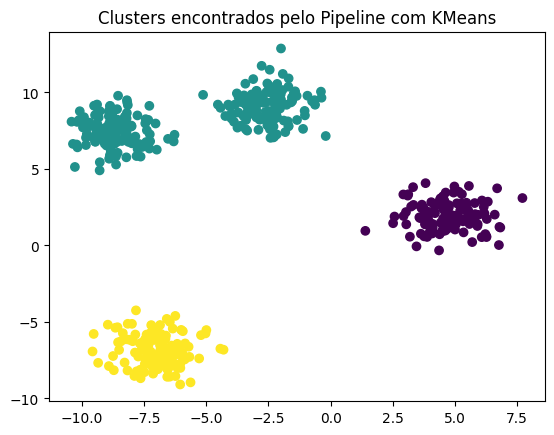

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=3, random_state=42))
])

pipeline.fit(X)
labels = pipeline['kmeans'].labels_



plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("Clusters encontrados pelo Pipeline com KMeans")
plt.show()


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data          # features
y = iris.target        # classes

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=500))
])

pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Acurácia:", acc)


Acurácia: 1.0


## 1) What can we use?

Preprocessing
- StandardScaler
- MinMaxScaler
- Normalizer
- OneHotEncoder
- OrdinalEncoder
...

Feature Selection
- SelectKBest
- SelectPercentile
- RFE
- RFECV
- VarianceThreshold

Dimensionality Reduction
- PCA
- KernelPCA
- NMF
- TruncatedSVD


## 2) What should be the last step?

The **last step** of a pipeline can be:

---

### ✅ A Transformer
- Only transforms the data
- Common in pipelines used just for preprocessing

---

### ✅ A Supervised Estimator
- Must implement `fit()`
- Accepts `predict()`

**Examples:**
- `LogisticRegression`
- `SVC`
- `RandomForestClassifier`
- `KNeighborsClassifier`
- `GradientBoosting`
- `XGBClassifier` / `LGBMClassifier` (from external libraries)

---

### ✅ An Unsupervised Estimator
- Must implement `fit()`
- May have `predict()` (but not always)

**Examples:**
- `KMeans`
- `DBSCAN` *(does not have `predict()` → pipeline work*
